# Raphael Christiano - 0706022310015

## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)


!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [3]:
#1
# load the data set
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [4]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
#3
df.isnull().sum()

,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

The overview reveals a complete dataset with no missing values, which is great for analysis!

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

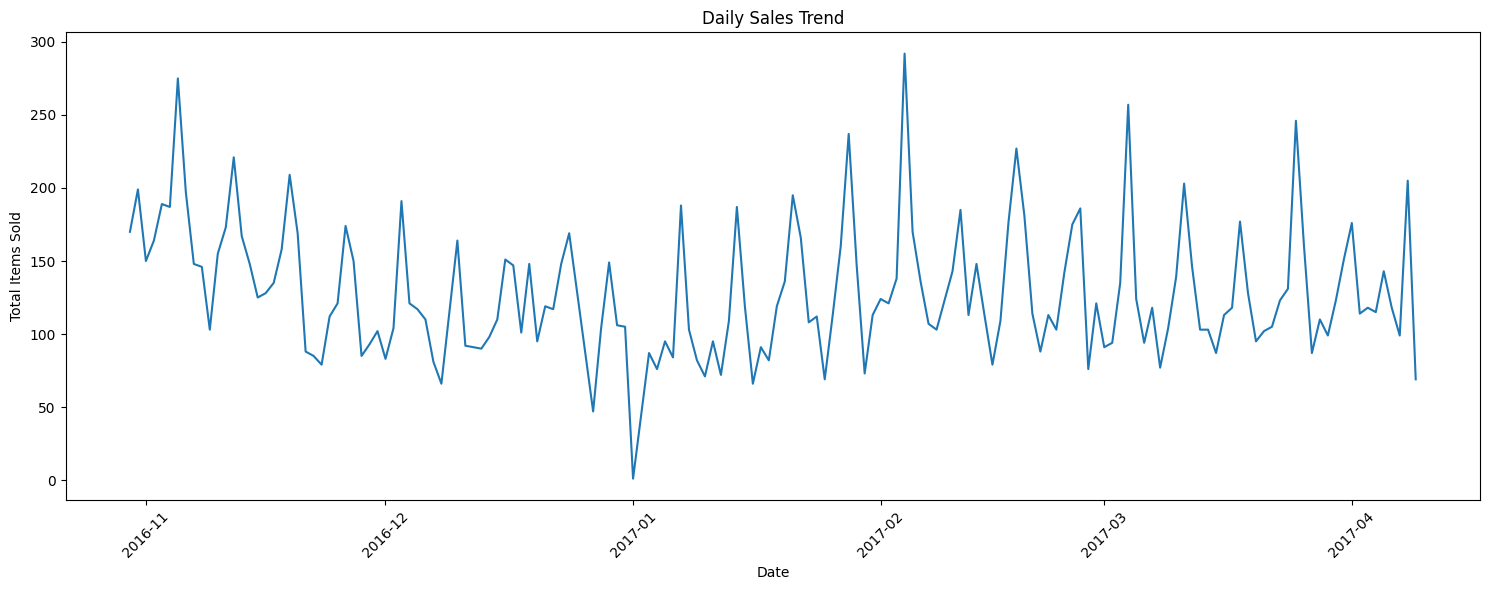

In [18]:
#5
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df['date'] = df['date_time'].dt.date
daily_sales_items = df.groupby('date')['Item'].count().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales_items['date'], daily_sales_items['Item'], linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [20]:
#6
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()
display(df.sample(5))

,Transaction,Item,date_time,period_day,weekday_weekend,date,day,month,year,time,hour,day_name
1289,628,Coffee,2016-11-05 15:21:00,afternoon,weekend,2016-11-05,5,11,2016,15:21:00,15,Saturday
5181,2576,Coffee,2016-12-03 16:37:00,afternoon,weekend,2016-12-03,3,12,2016,16:37:00,16,Saturday
10957,5472,Farm House,2017-01-28 09:47:00,morning,weekend,2017-01-28,28,1,2017,09:47:00,9,Saturday
4994,2486,Scandinavian,2016-12-03 08:30:00,morning,weekend,2016-12-03,3,12,2016,08:30:00,8,Saturday
19770,9346,Extra Salami or Feta,2017-04-04 09:04:00,morning,weekday,2017-04-04,4,4,2017,09:04:00,9,Tuesday



Alright, now I can easily create a visualization of monthly sales.

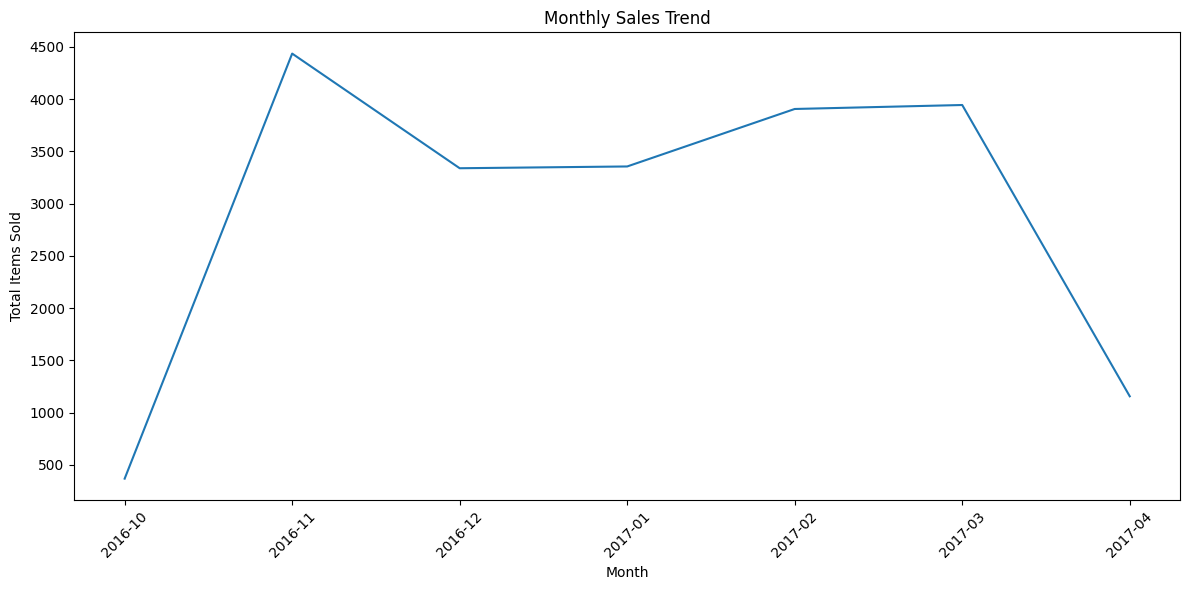

In [23]:
#7
monthly_sales_items = df.groupby(['year', 'month'])['Item'].count().reset_index()
monthly_sales_items['year_month'] = monthly_sales_items['year'].astype(str) + '-' + monthly_sales_items['month'].astype(str).str.zfill(2)
monthly_sales_items = monthly_sales_items.sort_values(by=['year', 'month'])

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_items['year_month'], monthly_sales_items['Item'], linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The monthly sales trend visualization provides better insights by clearly showing a significant sales peak in November, followed by strong and relatively consistent sales in January, February, and March. Sales for October and April appear lower, likely because these are incomplete months in the dataset.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [24]:
#9
unique_weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
unique_weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print(f"Unique weekday names: {unique_weekday_names}")
print(f"Unique weekend names: {unique_weekend_names}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [26]:
# 10
monthly_daily_transactions = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)
# Reorder columns to ensure consistent day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_daily_transactions = monthly_daily_transactions.reindex(columns=day_order, fill_value=0)
monthly_daily_transactions

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

The table reveals that weekends (Saturday and Sunday) consistently have the highest number of transactions across all months, significantly outperforming weekdays. Furthermore, November shows strong performance across all days of the week, especially on weekends. October and April have incomplete data, as evidenced by zero transactions for several weekdays in October and generally lower numbers in April.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

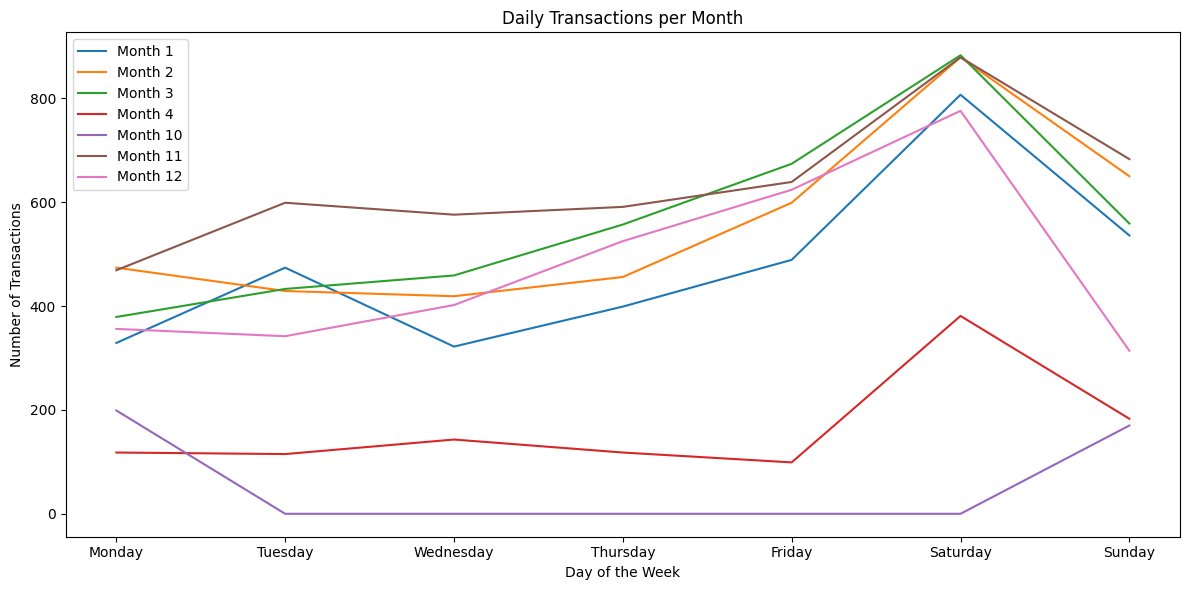

In [31]:
# 12
import matplotlib.pyplot as plt

# Ensure day order is Monday → Sunday (already handled when creating monthly_daily_transactions)
monthly_daily_transactions = monthly_daily_transactions[['Monday', 'Tuesday', 'Wednesday',
                           'Thursday', 'Friday', 'Saturday', 'Sunday']]

# --- Plot exactly like your example --- Using line plot as requested
plt.figure(figsize=(12, 6))

# one line per month
for month in monthly_daily_transactions.index:
    plt.plot(monthly_daily_transactions.columns,
             monthly_daily_transactions.loc[month],
             label=f"Month {month}")

plt.title("Daily Transactions per Month")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

After visualizing it like this, I can gain insights into the sales trends that weekends, particularly Saturdays, consistently experience the highest transaction volumes across almost all months, with November showing the strongest overall performance. Weekdays generally have lower sales, with Fridays often being the busiest among them. Months like October and April exhibit lower or incomplete data, suggesting partial periods.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [33]:
#14
display(df['period_day'].unique())

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [34]:
#15
unique_morning_hour = df[df['period_day'] == 'morning']['hour'].unique()
unique_afternoon_hour = df[df['period_day'] == 'afternoon']['hour'].unique()
unique_evening_hour = df[df['period_day'] == 'evening']['hour'].unique()
unique_night_hour = df[df['period_day'] == 'night']['hour'].unique()

print(f"Unique morning_hour: {unique_morning_hour}")
print(f"Unique afternoon_hour: {unique_afternoon_hour}")
print(f"Unique evening_hour: {unique_evening_hour}")
print(f"Unique night_hour: {unique_night_hour}")

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes, I did notice something odd! In the Unique morning_hour output, the hour 1 (1 AM) is listed. This is unusual because 1 AM is typically considered part of the 'night' period, not 'morning'. It might indicate a data entry error, or a specific definition of 'morning' in this dataset that extends unusually early.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

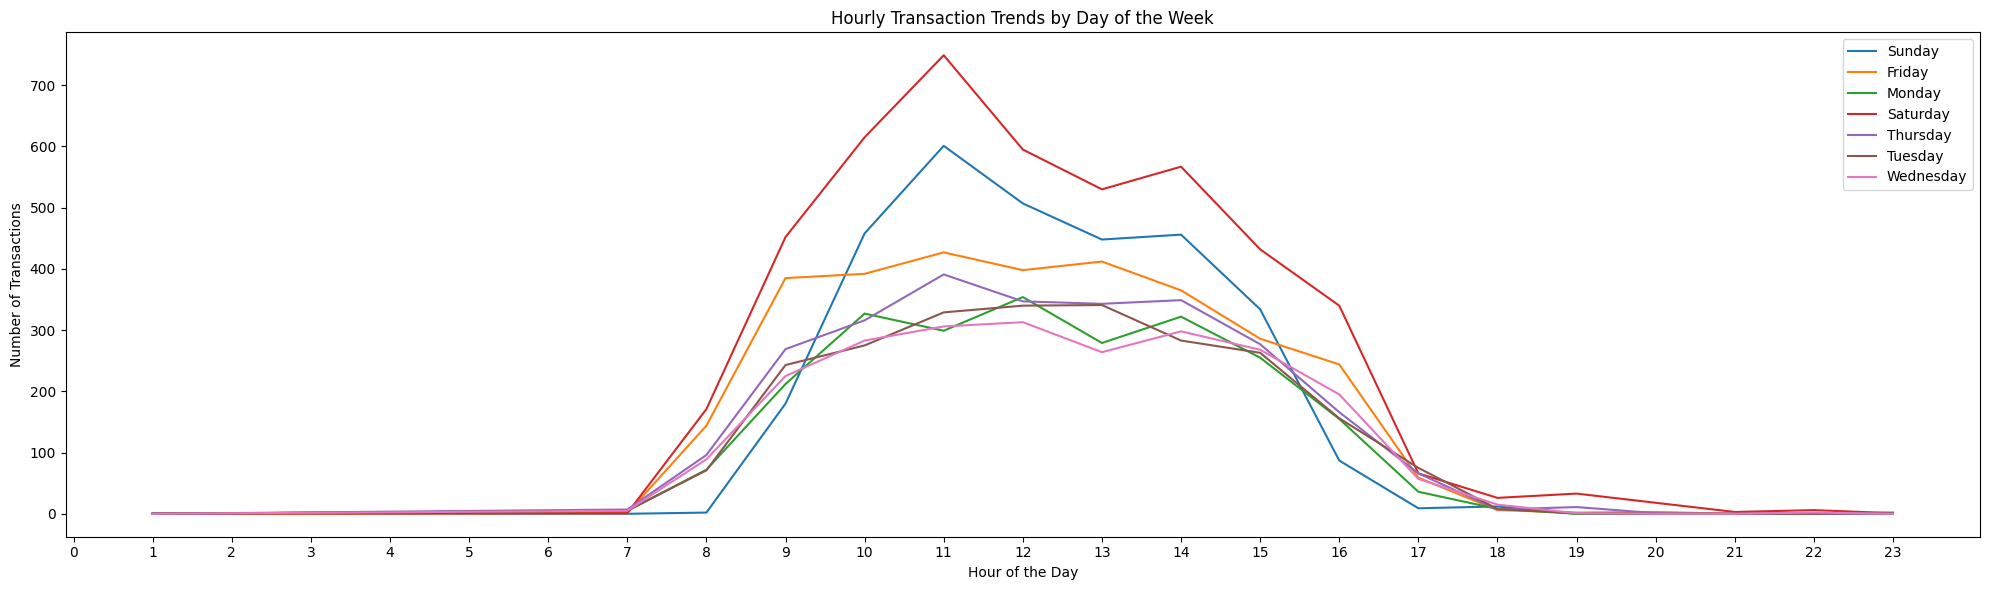

In [37]:
# 17
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure date_time is datetime
df["date_time"] = pd.to_datetime(df["date_time"], dayfirst=True)

# 2. Extract hour and day name
df["hour"] = df["date_time"].dt.hour
df["day_of_week"] = df["date_time"].dt.day_name()

# 3. Count rows (transactions/items) per hour per day of week
hourly_counts = (
    df.groupby(["day_of_week", "hour"])
      .size()
      .unstack("day_of_week")
      .fillna(0)
)

# 4. Reorder days so the legend matches the screenshot
desired_order = ["Sunday", "Friday", "Monday", "Saturday", "Thursday", "Tuesday", "Wednesday"]
hourly_counts = hourly_counts.reindex(columns=desired_order)

# 5. Plot – one line per day of week
plt.figure(figsize=(20, 6))

for day in hourly_counts.columns:
    plt.plot(hourly_counts.index, hourly_counts[day], label=day)

plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that ___________

The daily sales trend plot reveals that sales activity is highest during the late morning and early afternoon, specifically peaking between 10 AM and 2 PM, with 11 AM being the busiest hour. Sales gradually decline in the late afternoon and evening, becoming very low during early morning and late night hours.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

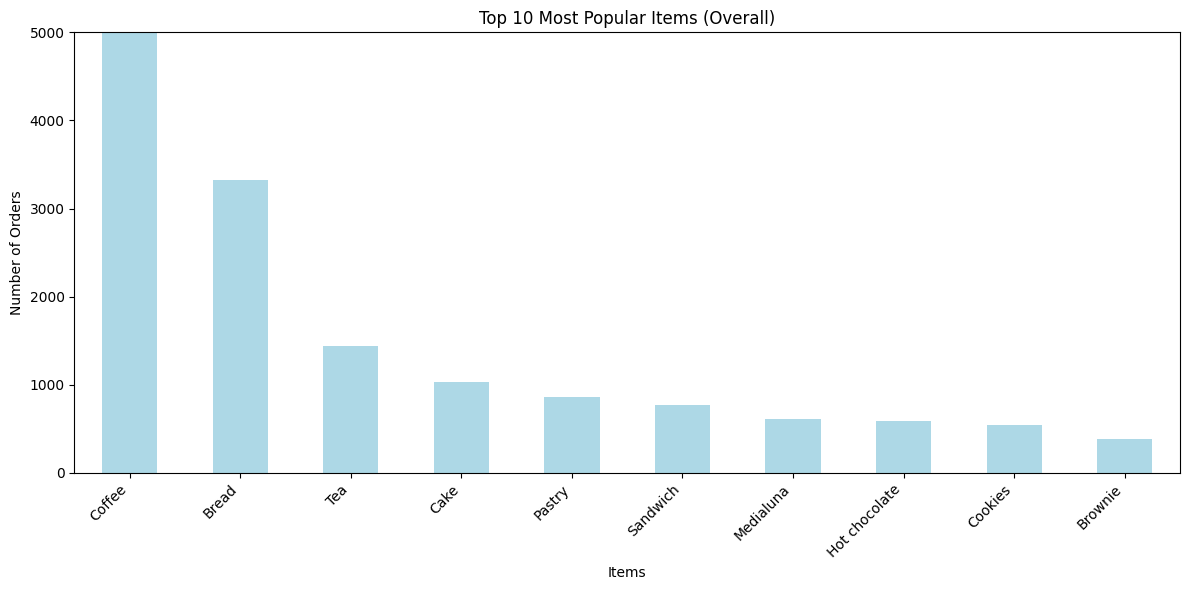

In [41]:
#19
item_counts = df['Item'].value_counts().head(10)

plt.figure(figsize=(12, 6))
item_counts.plot(kind='bar', color='lightblue')
plt.title('Top 10 Most Popular Items (Overall)')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.yticks([0, 1000, 2000, 3000, 4000, 5000])
plt.ylim(0, 5000) # Set y-axis limit
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

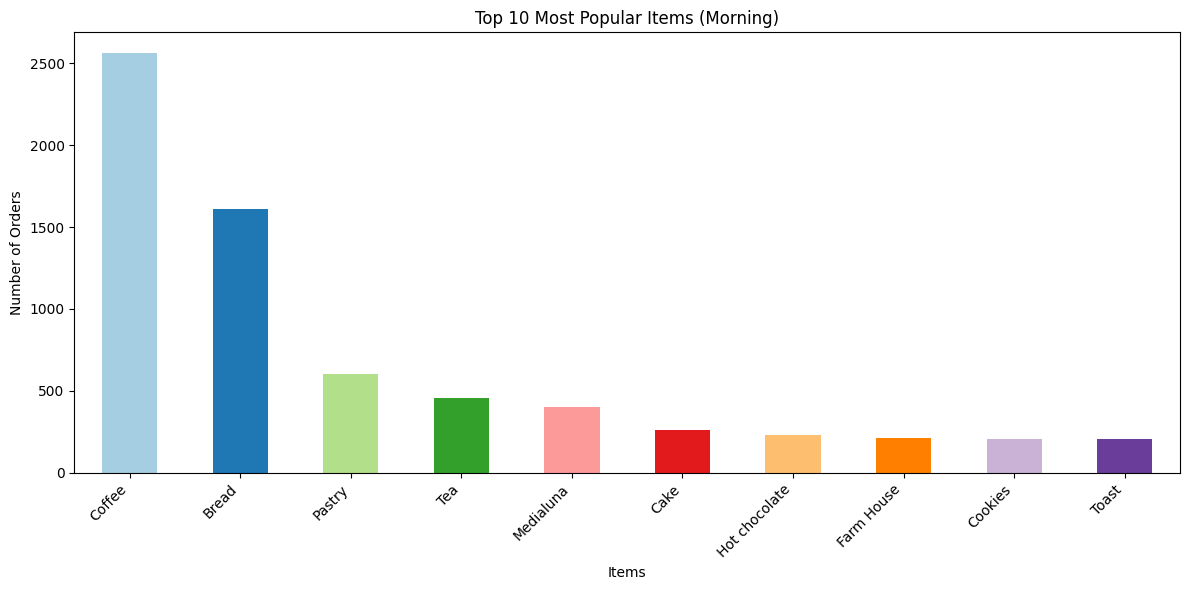

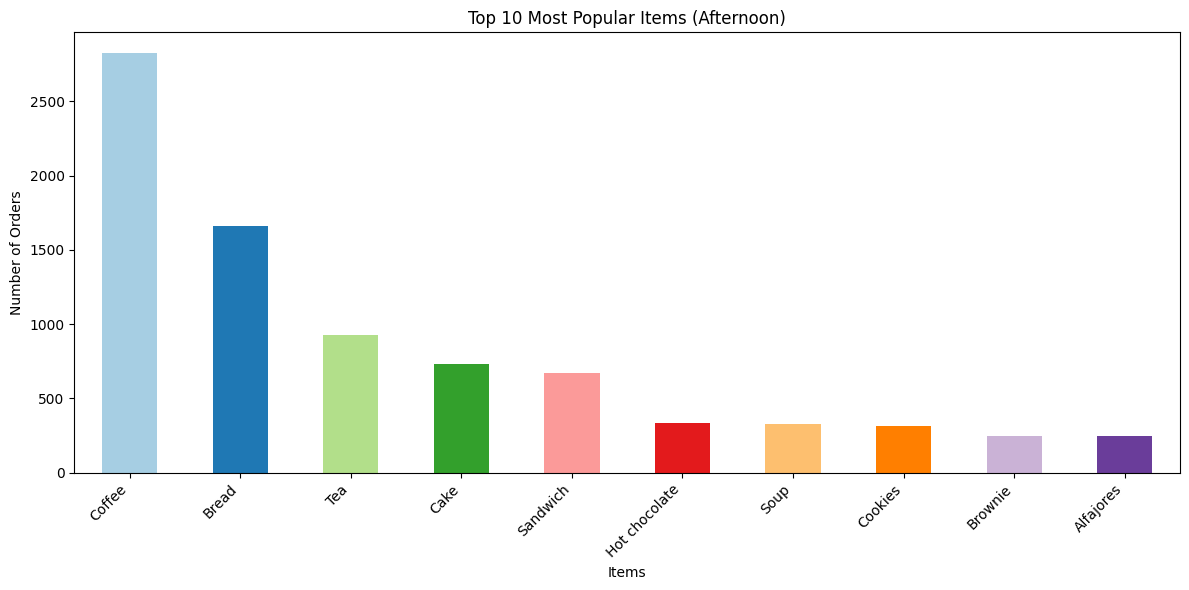

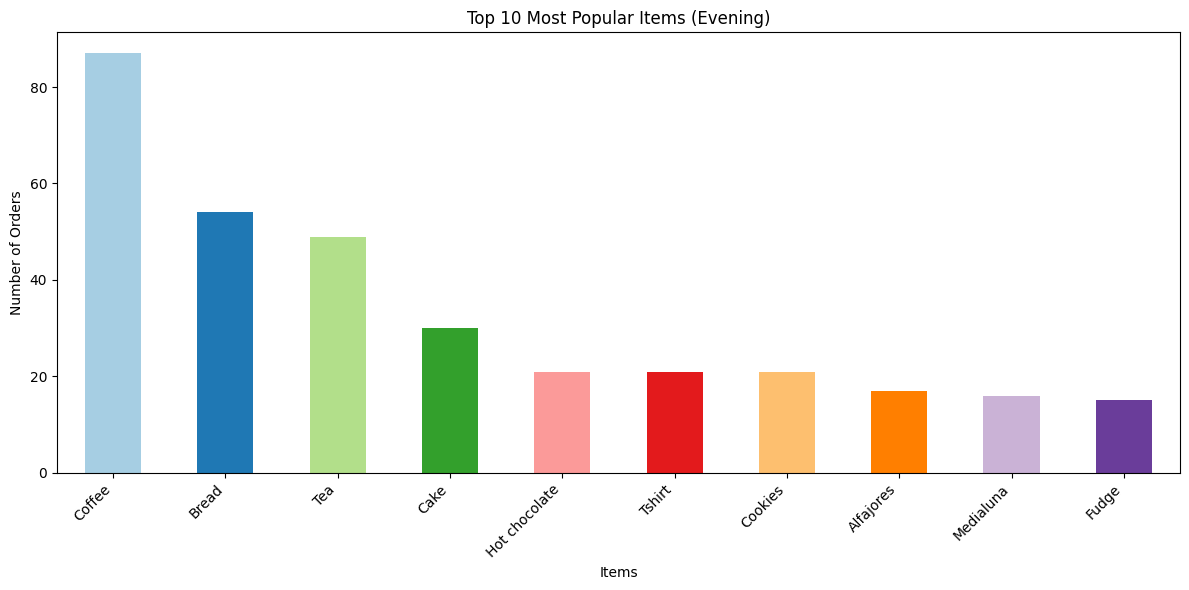

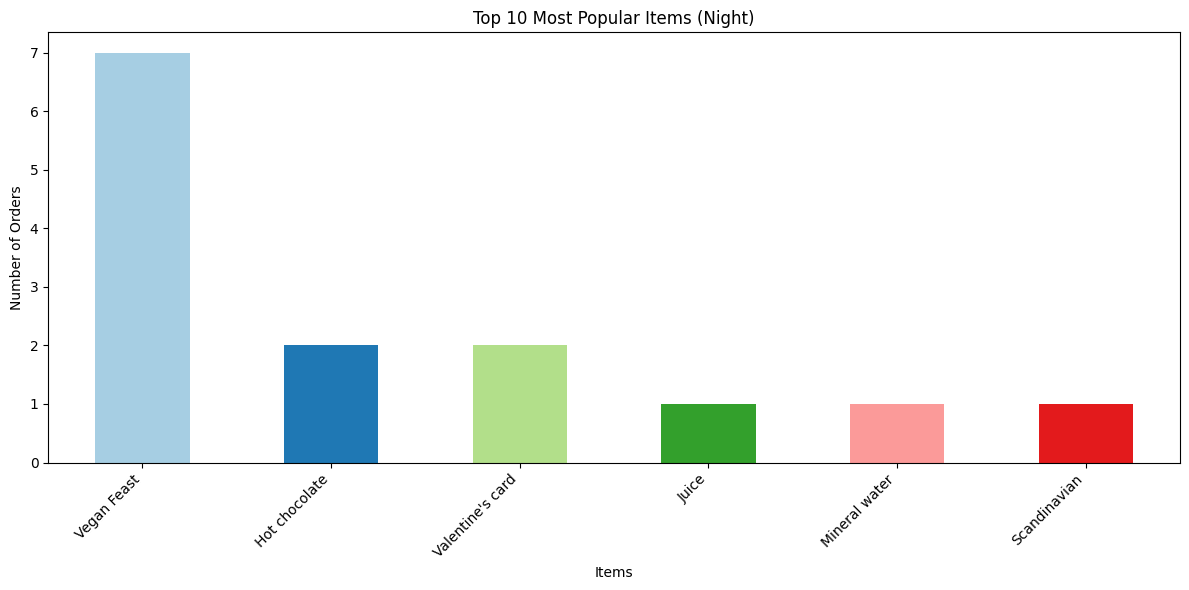

In [48]:
# 20

morning_sales_df = df[df['period_day'] == 'morning']
morning_item_counts = morning_sales_df['Item'].value_counts().head(10)

plt.figure(figsize=(12, 6))
morning_item_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 10 Most Popular Items (Morning)')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

afternoon_sales_df = df[df['period_day'] == 'afternoon']
afternoon_item_counts = afternoon_sales_df['Item'].value_counts().head(10)

plt.figure(figsize=(12, 6))
afternoon_item_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 10 Most Popular Items (Afternoon)')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

evening_sales_df = df[df['period_day'] == 'evening']
evening_item_counts = evening_sales_df['Item'].value_counts().head(10)

plt.figure(figsize=(12, 6))
evening_item_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 10 Most Popular Items (Evening)')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

night_sales_df = df[df['period_day'] == 'night']
night_item_counts = night_sales_df['Item'].value_counts().head(10)

plt.figure(figsize=(12, 6))
night_item_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 10 Most Popular Items (Night)')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


The item popularity varies significantly across different periods of the day. In the morning, Coffee and Bread are overwhelmingly dominant, indicating a strong breakfast culture. The afternoon sees a continuation of Coffee and Bread's popularity, but with a noticeable rise in items like Cake, Sandwich, and Hot chocolate, reflecting a shift towards lunch and afternoon snacks. By evening, sales volume drops considerably, and while core items like Coffee, Bread, and Tea are still present, other items like T-shirt, Cookies, and Alfajores appear, suggesting more varied or specific purchases. The night period experiences extremely low sales and a very limited variety, with 'Vegan Feast' and 'Valentine's card' (despite minimal sales) highlighting the scarcity of transactions and unique, occasional purchases during these late hours. Overall, while Coffee and Bread are bakery staples, the analysis reveals distinct shifts in customer preferences and purchasing patterns throughout the day that could inform targeted strategies

I found a valentine card, I was curious about when people bought it so I made a visualization of it

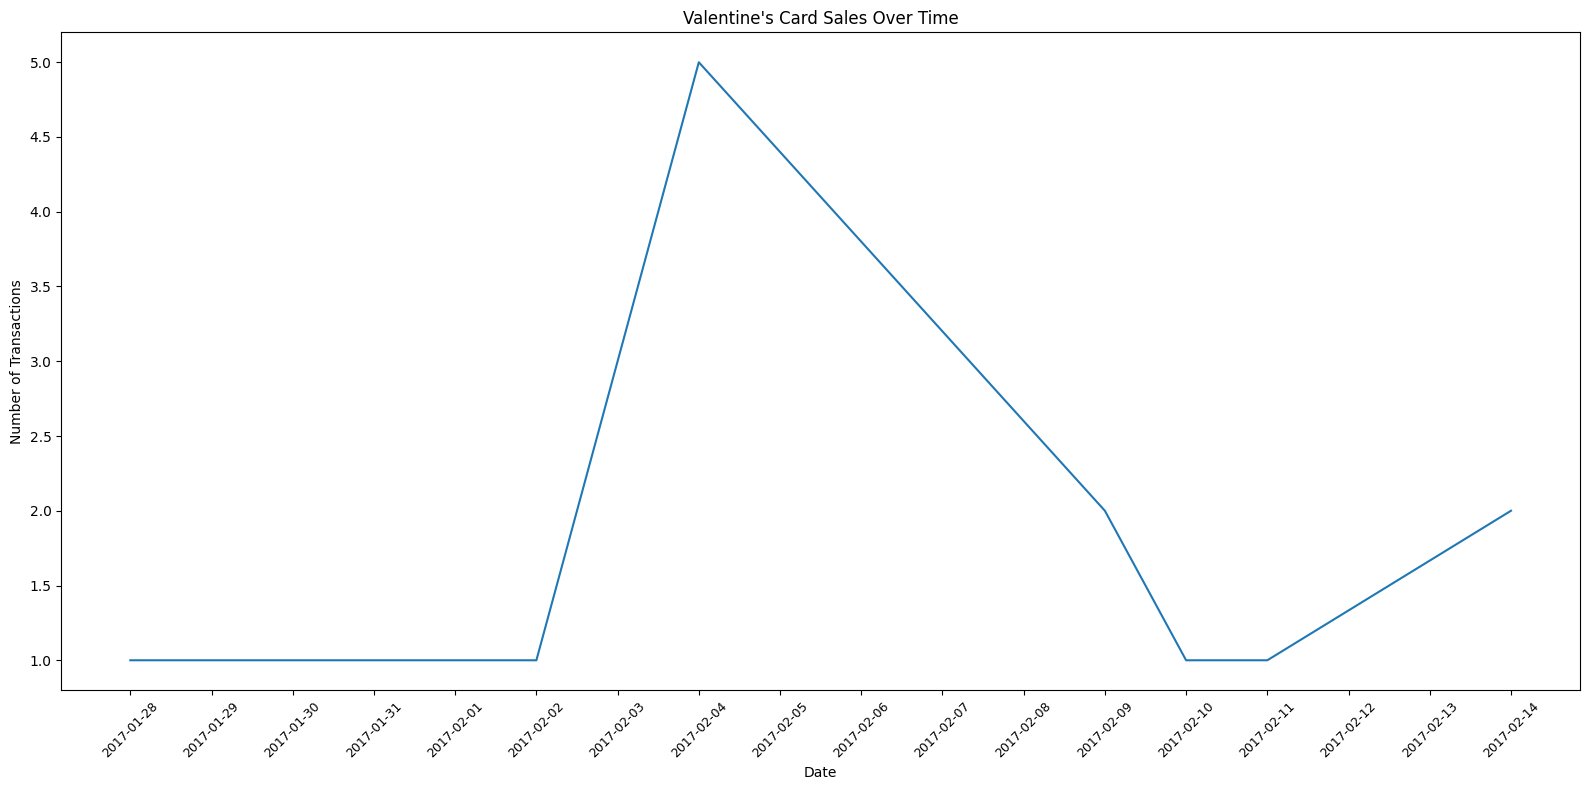

In [53]:
#22
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime
df["date_time"] = pd.to_datetime(df["date_time"], dayfirst=True)

# Filter Valentine's card
valentine_df = df[df["Item"] == "Valentine's card"].copy()

# Extract only the date
valentine_df["date"] = valentine_df["date_time"].dt.date
valentine_daily = valentine_df.groupby("date").size()

# Convert index to proper datetime for formatting
dates = pd.to_datetime(valentine_daily.index)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(dates, valentine_daily.values)

plt.title("Valentine's Card Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))   # show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, fontsize=9)

plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


The most significant sales peak for Valentine's cards occurred on February 4th, well in advance of Valentine's Day itself. After this early peak, sales dropped considerably, with only a small resurgence right on February 14th. This suggests that customers tend to purchase these cards earlier in the month rather than waiting until the day of the holiday

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [54]:
#24
basket = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
display(basket.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#25
# Convert quantities to 1 and 0
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
display(basket_encoded.head())

/tmp/ipython-input-4237972856.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [63]:
#26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
display(frequent_itemsets)

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [60]:
# 27
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
display(rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Managerial Implications
Store layout and shelf placement

Place related items close together: Based on the strong association rules and frequent itemsets, consider placing:
Coffee alongside Toast, Cake, Medialuna, Pastry, Sandwich, Cookies, Hot chocolate, and Juice. These are very strong associations, suggesting customers often purchase these items together with their coffee.
Bread near Pastry.
Cake near Tea.
Reasoning: The analysis clearly shows these items are frequently purchased together. Reducing the distance between them makes it easier for customers to find and purchase complementary items, potentially increasing basket size and customer satisfaction.
Bundling and promotions

Create combo deals based on strong rules (high confidence and lift):
"Morning Boost": Combine Coffee with Toast, given its high confidence (70.4%).
"Tea Time Treat": Bundle Tea with Cake or Cake with Tea (high lift 1.6).
"Mid-day Snack": Offer Coffee with Medialuna, Pastry, or Sandwich.
"Hot Drink & Sweet": Bundle Coffee with Cookies or Hot chocolate.
Run targeted promotions during peak times: Focus on promoting these bundles during the morning and afternoon peak hours when these items are most popular.
Reasoning: These bundles leverage combinations customers already tend to buy, leading to higher conversion rates and incremental sales compared to random pairings.
Recommendation systems (online or loyalty app)

Use rules directly for "Customers who bought X also buy Y": Implement these recommendations based on the strongest rules identified:
If a customer buys Toast, recommend Coffee.
If a customer buys Medialuna, recommend Coffee.
If a customer buys Pastry, recommend Coffee (or Bread).
If a customer buys Cake, recommend Coffee (or Tea).
If a customer buys Sandwich, recommend Coffee.
Reasoning: The high confidence and lift values for these associations mean that these suggestions will feel highly relevant and helpful to customers, enhancing their shopping experience and driving further purchases.
